In [59]:
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy.stats as st
import numpy as np
import json
%matplotlib inline

In [60]:
weather=pd.read_csv('~/Desktop/311/seperate data/gsom_seasonal.csv')
sea=pd.read_csv('~/Desktop/311/seperate data/seasonal_by_tract.csv')
station=pd.read_csv('~/Desktop/311/seperate data/tracts_with_nearest_stations.csv')

In [61]:
seasonal = sea.rename(columns=dict(zip(sea.columns[2:],sea.columns[2:].str[:-2])))

In [62]:
si = ['5000900','5011402','5017009','5025100','5014607',
      '5017010','5032300','5000300','5027702','5014700']
               
ch=['1019000','1020102','1025700','1019702','1020000','1022200',
             '1021600','1018600','1022000','1021800']


In [63]:
seasonal['created_date'] = sea['created_date'].str[:-3]

In [64]:
colDict = {}
with open('data.json', 'r') as fp:
    colDict = json.load(fp)

In [65]:
grpLoc = seasonal.pivot_table(index='created_date', columns='complaint_type')

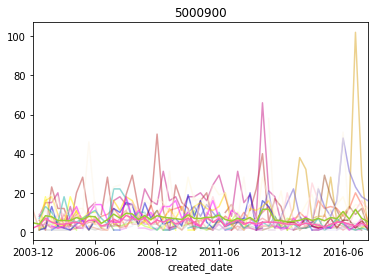

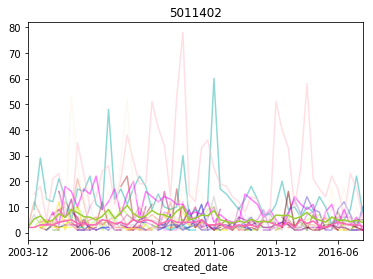

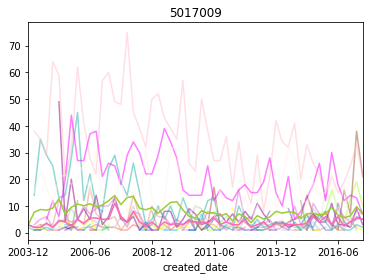

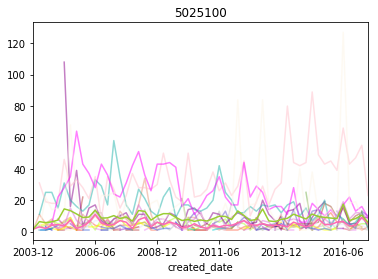

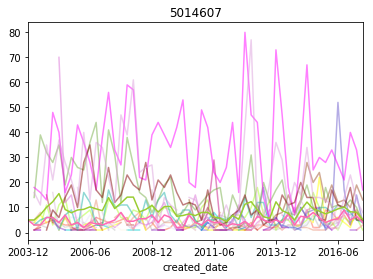

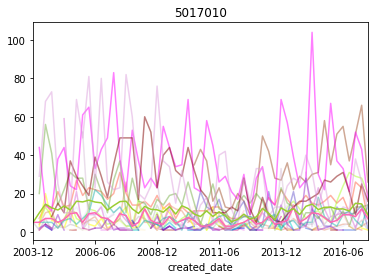

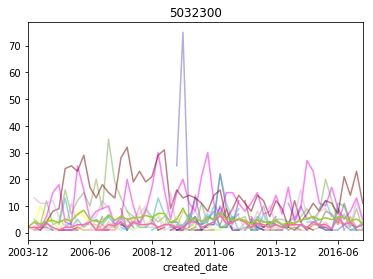

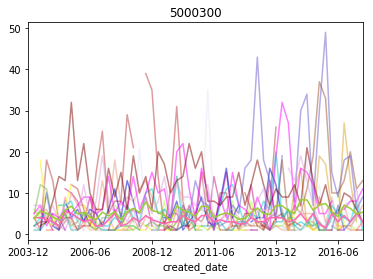

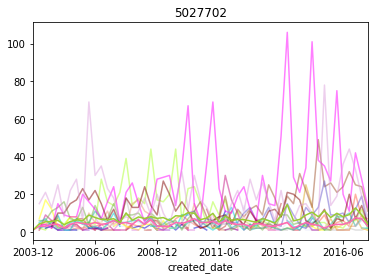

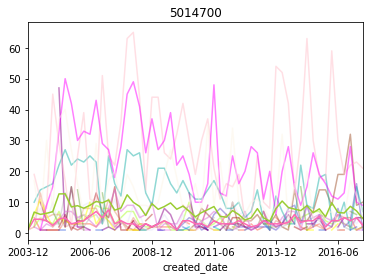

In [66]:
for x in si:
    if 'Sewer' not in grpLoc[x].columns:
        continue
    fig, ax = plt.subplots()
    grpLoc[x].plot(ax=ax, alpha=0.5, color=colDict.values())
    med = grpLoc[x].median(axis=1).plot(ax=ax, color='hotpink')
    mn = grpLoc[x].mean(axis=1).plot(ax=ax, color='yellowgreen')
    ax.legend_.remove()
    ax.set_title(x)
    #ax.legend((med, mn), ("median", "mean"))

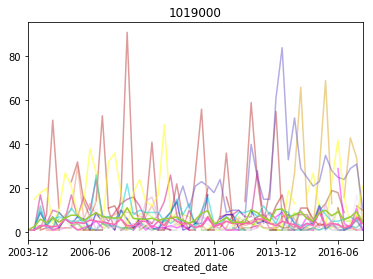

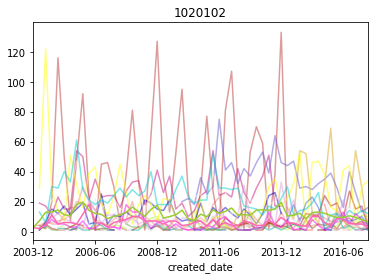

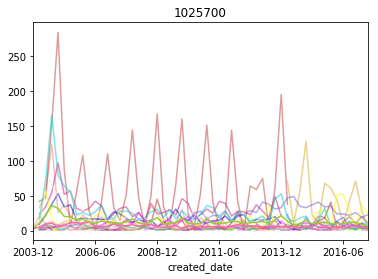

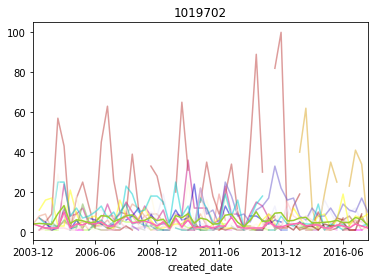

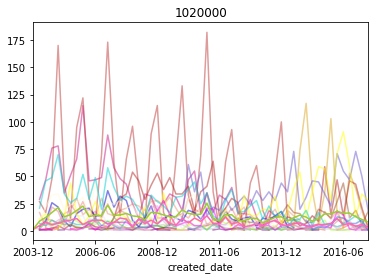

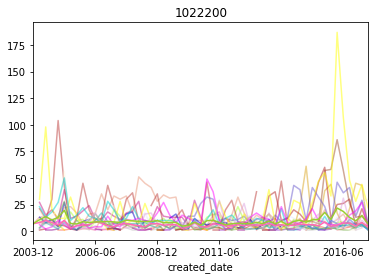

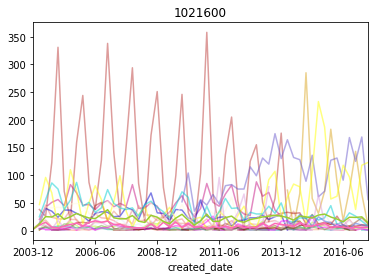

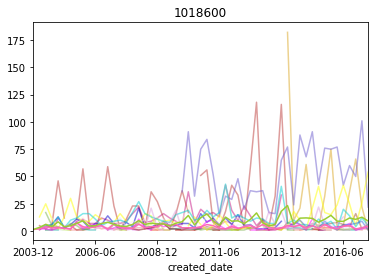

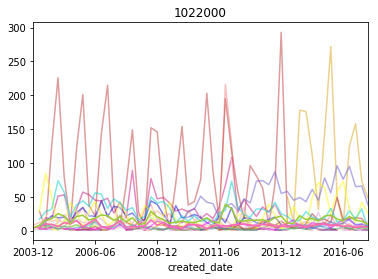

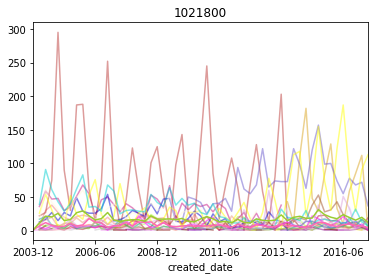

In [68]:
for x in ch:
    if 'Sewer' not in grpLoc[x].columns:
        continue
    fig, ax = plt.subplots()
    grpLoc[x].plot(ax=ax, alpha=0.5, color=colDict.values())
    med = grpLoc[x].median(axis=1).plot(ax=ax, color='hotpink')
    mn = grpLoc[x].mean(axis=1).plot(ax=ax, color='yellowgreen')
    ax.legend_.remove()
    ax.set_title(x)
    #ax.legend((med, mn), ("median", "mean"))

In [69]:
colList = np.array([colDict[cl] for cl in grpLoc[tid].columns])

In [70]:
colList[:,-1] -= .25

In [88]:
def graphTract(tid, colList, bor, medianC = 'darkblue', meanC = 'darkblue', mdcl = '--', mncl = ':', figsize=(12.5, 5), legsize = 20):
    fig, ax = plt.subplots(figsize=figsize)
    grpLoc[tid].plot(ax=ax, color=colList, linewidth=3)
    grpLoc[tid].median(axis=1).plot(color=medianC, label="median", linewidth=5, linestyle=mdcl, fontsize=20)
    grpLoc[tid].mean(axis=1).plot(color=meanC, label="mean", linewidth=5, linestyle=mncl, fontsize=20)
    ax.legend_.remove()
    medL = plt.Line2D((0,1),(0,0), color=medianC, linestyle=mdcl)
    menL = plt.Line2D((0,1),(0,0), color=meanC, linestyle=mncl)

    ax.legend(prop={'size':legsize}, handles=(medL, menL), labels=("median", "mean"))
    ax.set_title(f"{bor} Census Tract {tid}", fontsize=24)

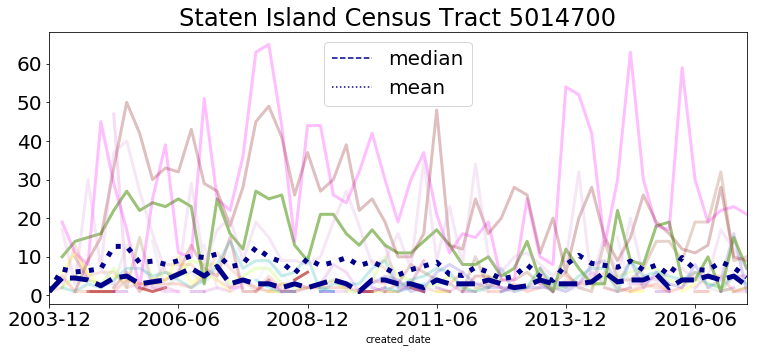

In [89]:
graphTract('5014700', colList, "Staten Island")

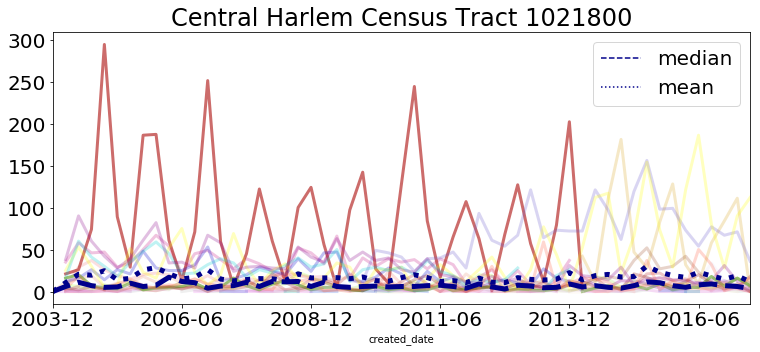

In [91]:
graphTract('1021800', colList, 'Central Harlem')